# Saudi Arabia Real Estate Analysis
> By Abdulaziz AlTwaijri

## 1- Introduction

This dataset, sourced from [aqar.fm](https://sa.aqar.fm/), provides a comprehensive collection of real estate listings in Saudi Arabia. It includes properties available for sale or rent and covers a wide range of listing attributes and pricing information. The dataset represents all publicly accessible listings up until the date of collection (2023/05/03).

The dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/mohdph/saudi-arabia-real-estate-dataset) - `database.db (969.8 MB)`


### 1.A Dataset Description

The dataset consists of a single table, "Listings," which includes various attributes describing the real estate listings. Here is a brief description of the columns:

- **id**: Unique identifier for each listing.
- **uri**: String representing the listing's URI.
- **title**: Title of the listing.
- **price**: Price of the listing in Saudi Riyal.
- **content**: Textual description of the listing.
- **imgs**: JSON array containing image URLs associated with the listing.
- **refresh**: Unix timestamp indicating the last update time of the listing.
- **category**: Integer representing the category of the listing.
- **beds**: Number of beds in the listing.
- **livings**: Number of living rooms in the listing.
- **wc**: Number of bathrooms in the listing.
- **area**: Area of the listing.
- **type**: Integer representing the type of the listing.
- **street_width**: Width of the street where the listing is located.
- **age**: Age of the listing.
- **last_update**: Unix timestamp indicating the most recent update time.
- **street_direction**: Integer representing the street direction of the listing.
- **ketchen**: Binary value indicating whether the listing has a kitchen.
- **ac**: Binary value indicating whether the listing has air conditioning.
- **furnished**: Binary value indicating whether the listing is furnished.
- **location.lat**: Latitude of the listing's location.
- **location.lng**: Longitude of the listing's location.
- **path**: Path to the listing page.
- **user.review**: Average user review rating for the listing.
- **user.img**: Image associated with the listing user.
- **user.name**: Name of the listing user.
- **user.phone**: Phone number of the listing user.
- **user.iam_verified**: Binary value indicating whether the listing user is verified.
- **user.rega_id**: Identifier for the listing user's registration.
- **native.logo**: Logo associated with the native source.
- **native.title**: Title of the native source.
- **native.image**: Image associated with the native source.
- **native.description**: Description of the native source.
- **native.external_url**: External URL of the native source.
- **rent_period**: Integer representing the rental period.
- **city**: City of the listing in Arabic.
- **city_id**: Identifier for the listing's city.
- **district**: District of the listing in Arabic.
- **district_id**: Identifier for the listing's district.
- **width**: Width of the listing.
- **length**: Length of the listing.
- **advertiser_type**: Type of the listing user.
- **create_time**: Unix timestamp indicating the creation time of the listing.
- **has_extended_details**: Binary value indicating whether the listing has extended details.
- **daily_rentable**: Binary value indicating whether the listing is available for daily rent.

## 2- Objective
The objective is to draw some insights from the data and try to build a model that can predict the price of a property based on its features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from IPython.display import display

table_name = 'Listings'

# Connect to database
conn = sql.connect('aqar.db')

# Read data from database
df = pd.read_sql_query(f'SELECT * FROM {table_name}', conn)

# Close connection
conn.close()

df.head(3)

,user_id,id,uri,title,price,content,imgs,refresh,category,beds,...,district,district_id,width,length,advertiser_type,create_time,has_extended_details,daily_rentable,createdAt,updatedAt
0,10065,4331,شارع-الياقوت-الدار-البيضاء-الرياض,"أرض للبيع في شارع الياقوت, الدار البيضاء, الرياض",1958400.0,تجاريه ش ياقوت ٦٠ مساحه ٨١٦ تقريبا,"[""000000000_1627687178830.jpg""]",1672495809,2,0.0,...,حي الدار البيضاء,424,25.0,32.0,None,1415294130,NaN,0.0,2023-01-01 14:13:28.553 +00:00,2023-01-01 14:13:28.553 +00:00
1,11005,4837,طريق-الملك-عبدالله-بن-عبدالعزيز-الفرعي-المغرزا...,أرض للبيع في طريق الملك عبدالله بن عبدالعزيز ا...,15078000.0,الارض على طريق الملك عبدالله على شارعين مظاهره...,"[""000000000_1627687181813.jpg""]",1672040788,2,0.0,...,حي المغرزات,566,NaN,NaN,None,1416054461,NaN,0.0,2023-01-01 14:52:38.169 +00:00,2023-01-01 14:52:38.169 +00:00
2,8017,5498,5-المملكة-العربية-السعودية-5498,أرض للبيع في 5 المملكة العربية السعودية,8057700.0,الارض استثماريه في محافظة البرك طريق جده جازان...,"[""506610555_1417214243205.jpg"",""506610555_1417...",1671819056,2,0.0,...,حي الروضة,4100,NaN,NaN,None,1417220044,NaN,0.0,2023-01-01 15:01:52.351 +00:00,2023-01-01 15:01:52.351 +00:00


## 3- Cleaning and Exploring the Data
> Since cleaning is an iterative process, I will be cleaning and exploring the data at the same time.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543197 entries, 0 to 543196
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               543197 non-null  int64  
 1   id                    543197 non-null  int64  
 2   uri                   543197 non-null  object 
 3   title                 543182 non-null  object 
 4   price                 543197 non-null  float64
 5   content               542993 non-null  object 
 6   imgs                  543197 non-null  object 
 7   refresh               543197 non-null  int64  
 8   category              543197 non-null  int64  
 9   beds                  336223 non-null  float64
 10  livings               336705 non-null  float64
 11  wc                    335285 non-null  float64
 12  area                  542688 non-null  float64
 13  type                  134828 non-null  float64
 14  street_width          533094 non-null  float64
 15  

> This dataset is huge, 500k entries with 48 columns. And some columns have a lot of missing values. Lets deal with them at the end of the cleaning process.

> Since there are a lot of columns, I will drop the columns that don't provide any value to the analysis.

In [7]:
unwanted_columns = {
 'content',
 'advertiser_type',
 'daily_rentable',
 'has_extended_details',
 'imgs',
 'location.lat',
 'location.lng',
 'native.description',
 'native.external_url',
 'native.image',
 'native.logo',
 'native.title',
 'type', # We already have `category`, which is a column with no missing values, while type has a lot of missing values.
 'path',
 'refresh',
 'rent_period',
 'street_direction',
 'title',
 'uri',
 'user.iam_verified',
 'user.img',
 'user.name',
 'user.phone',
 'user.rega_id',
 'user.review',
 'user_id',
'length','width', # Since we have the `area`, we don't need the length and width
'last_update','create_time', 'createdAt',   # Since we have `updatedAt`, it is sufficient.
}

# Rename ketchen to kitchen (Typo from the data source)
df.rename(columns={'ketchen': 'kitchen'}, inplace=True)

df.drop(columns=unwanted_columns, inplace=True)


In [8]:
df.head(3)

,id,price,category,beds,livings,wc,area,street_width,age,kitchen,ac,furnished,city,city_id,district,district_id,updatedAt
0,4331,1958400.0,2,0.0,0.0,0.0,816.0,60.0,0.0,0.0,0.0,0.0,الرياض,21,حي الدار البيضاء,424,2023-01-01 14:13:28.553 +00:00
1,4837,15078000.0,2,0.0,0.0,0.0,1077.0,80.0,0.0,0.0,0.0,0.0,الرياض,21,حي المغرزات,566,2023-01-01 14:52:38.169 +00:00
2,5498,8057700.0,2,0.0,0.0,0.0,23022.0,15.0,0.0,0.0,0.0,0.0,محايل,92,حي الروضة,4100,2023-01-01 15:01:52.351 +00:00


> Now we have more digestible set of columns to work with. With potentially more columns to drop if needed.

In [9]:
df.duplicated().sum()

0

> We have 0 duplicates, which is great.

> Lets check the data types of the columns.

In [10]:
df.dtypes

id                int64
price           float64
category          int64
beds            float64
livings         float64
wc              float64
area            float64
street_width    float64
age             float64
kitchen         float64
ac              float64
furnished       float64
city             object
city_id           int64
district         object
district_id       int64
updatedAt        object
dtype: object

In [11]:
# Columns that should be boolean
boolean_columns = ['kitchen', 'ac', 'furnished']

df.loc[:, ['kitchen', 'furnished']] = df.loc[:, ['kitchen', 'furnished']].fillna(False)
df.loc[:, ['ac']] = df.loc[:, ['ac']].fillna(True)

df.loc[:, boolean_columns] = df.loc[:, boolean_columns].astype(bool)

# Columns that should be integer
integer_columns = ['beds', 'livings', 'wc']  # I am going to assume that NaN also means 0.
                                             # Which is reasonable. Since if there is no beds, then it is 0.

# Fill with 0 instead of NaN, so that we can convert to integer.
df.loc[:, integer_columns] = df.loc[:, integer_columns].fillna(0)

# Convert to integer
df.loc[:, integer_columns] = df.loc[:, integer_columns].astype(int)


df['updatedAt'] = pd.to_datetime(df['updatedAt'])



> The categories are integer, but they are actually categorical variables. So lets convert them to categorical variables so that it becomes readable.

In [12]:
category_mapping = {
    1: 'Apartment, rental',
    2: 'Land, sell',
    3: 'Villa, sell',
    4: 'Floor, rental',
    5: 'Villa, rental',
    6: 'Apartment, sell',
    7: 'Building, sell',
    8: 'Store, rental',
    9: 'House, sell',
    10: 'Esterahah, sell',
    11: 'House, rental',
    12: 'Farm, sell',
    13: 'Esterahah, rental',
    14: 'Office, rental',
    15: 'Land, rental',
    16: 'Building, rental',
    17: 'Warehouse, rental',
    18: 'Campsite, rental',
    19: 'Room, rental',
    20: 'Store, sell',
    21: 'Furnished apartment',
    22: 'Floor, sell',
    23: 'Chalet, rental'
}

df['category'] = df['category'].map(category_mapping)

In [13]:
df.dtypes

id                            int64
price                       float64
category                     object
beds                          int32
livings                       int32
wc                            int32
area                        float64
street_width                float64
age                         float64
kitchen                        bool
ac                             bool
furnished                      bool
city                         object
city_id                       int64
district                     object
district_id                   int64
updatedAt       datetime64[ns, UTC]
dtype: object

> Lets see if there are any old listings that haven't been updated for a long time.

In [14]:
(df.updatedAt).min(), (df.updatedAt).max()

(Timestamp('2023-01-01 13:28:57.958000+0000', tz='UTC'),
 Timestamp('2023-05-03 02:29:05.276000+0000', tz='UTC'))

> Good, the minimum is still in 2023. Also, that was our only use of the `updatedAt` column, I will drop it now.

In [15]:
df.drop(columns=['updatedAt'], inplace=True)

In [16]:
df.isnull().sum()

id                   0
price                0
category             0
beds                 0
livings              0
wc                   0
area               509
street_width     10103
age             204136
kitchen              0
ac                   0
furnished            0
city                 0
city_id              0
district             0
district_id          0
dtype: int64

> Now we have three columns with missing values. Which are `area`, `street_width`, and `age`.

> The most important one of them is `area`, and it is hard to fill it with a value. So I will drop the rows with missing values. Thankfully, they are not that many.

> Also, the `street_width` column has a lot of missing values, but I would rather to drop 10k rows (out of 500k rows) than to fill it with a potentially misleading value.

> For the `age` column, it suffers extremely from missing values, and we cannot virtually fill it with any value. And we cannot afford to drop 200k rows, so I will drop the column. But there is a chance that this variable appears to be important to the model, in that case, maybe it is worth it to drop the rows with missing values. But for now, lets drop the column.

In [17]:
df.dropna(subset=['area', 'street_width'], inplace=True)
df.drop(columns=['age'], inplace=True)

> Lets see the count of nulls again.

In [18]:
df.isnull().sum()

id              0
price           0
category        0
beds            0
livings         0
wc              0
area            0
street_width    0
kitchen         0
ac              0
furnished       0
city            0
city_id         0
district        0
district_id     0
dtype: int64

> Good, now we have a clean dataset to work with.

### 3.A Exploring the target variable (`price`)

In [19]:
df.price.describe()

count    5.330820e+05
mean     3.444970e+06
std      5.322150e+07
min      1.000000e+00
25%      4.200000e+05
50%      1.000000e+06
75%      2.070000e+06
max      1.000000e+10
Name: price, dtype: float64

> The minimum price is 1, which is weird. Lets see the listing with the minimum price.

In [20]:
# The listings with the minimum price
min_price_listings = df[df.price == df.price.min()]
min_price_listings.head()

,id,price,category,beds,livings,wc,area,street_width,kitchen,ac,furnished,city,city_id,district,district_id
25165,4034068,1.0,"Chalet, rental",2,1,2,100.0,5.0,True,True,False,ابها,1,حي القرى,3812
124478,4682690,1.0,"Floor, sell",5,1,4,400.0,20.0,False,True,False,جازان,65,حي السويس,152
136556,4723769,1.0,"Store, rental",0,0,0,900.0,50.0,False,True,False,خميس مشيط,70,حي الربيع,4014
191967,4860874,1.0,"Chalet, rental",5,2,4,600.0,60.0,True,True,False,رماح,76,حي رماح,942
218708,4910494,1.0,"Chalet, rental",3,2,5,525.0,5.0,True,True,False,الخبر,12,حي التحلية,1056


> They might be legit.. lets check some of them in Aqar website.

In [21]:
url = "https://sa.aqar.fm/ad/"

for listing in min_price_listings.itertuples():
    print(f'{url}{listing.id}')

https://sa.aqar.fm/ad/4034068
https://sa.aqar.fm/ad/4682690
https://sa.aqar.fm/ad/4723769
https://sa.aqar.fm/ad/4860874
https://sa.aqar.fm/ad/4910494
https://sa.aqar.fm/ad/4956226
https://sa.aqar.fm/ad/5036838
https://sa.aqar.fm/ad/5042924
https://sa.aqar.fm/ad/5054639
https://sa.aqar.fm/ad/5069468
https://sa.aqar.fm/ad/5106952
https://sa.aqar.fm/ad/5140414
https://sa.aqar.fm/ad/5146412
https://sa.aqar.fm/ad/5166936
https://sa.aqar.fm/ad/5191269
https://sa.aqar.fm/ad/5197415
https://sa.aqar.fm/ad/5197897
https://sa.aqar.fm/ad/5206912
https://sa.aqar.fm/ad/5222911
https://sa.aqar.fm/ad/5224724
https://sa.aqar.fm/ad/5226389
https://sa.aqar.fm/ad/5242593
https://sa.aqar.fm/ad/5250093
https://sa.aqar.fm/ad/5255325
https://sa.aqar.fm/ad/5268040
https://sa.aqar.fm/ad/5270618
https://sa.aqar.fm/ad/5300801
https://sa.aqar.fm/ad/5308196
https://sa.aqar.fm/ad/5313730
https://sa.aqar.fm/ad/5315751


> After closer inspection, apparently some of them are legit. But the most are either not found or closed.

> But there is no way that someone is going to sell a property for 1 riyal. The website does not enforce verification of the listing price, so it is possible to put any price you want. The ones putting 1 riyal are either trying to get attention to their listings or they are trolling.

> So, I think it is safe to drop the rows with price less than 50 riyals.

In [22]:
# Dropping rows with price less than 50
df = df[df.price >= 50]

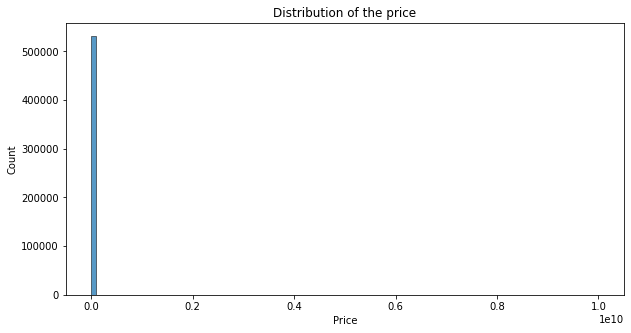

In [23]:
# Plotting the distribution the price.
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='price', ax=ax, bins=100)
ax.set_title('Distribution of the price')
ax.set_xlabel('Price')
ax.set_ylabel('Count')
plt.show()


> The distribution looks weird, there might be some extreme values at the right side of the distribution. They might be outliers, but I will leave them for now.

> Maybe a log transformation will help.

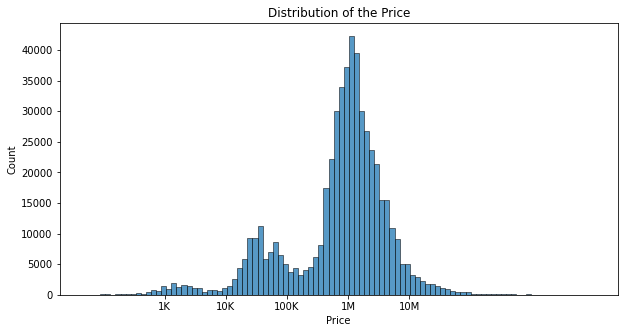

In [24]:
# Plotting the distribution of the price after log transformation.
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=np.log(df['price']), ax=ax, bins=100)

# Define the desired x-axis tick positions and labels
xticks = [1000, 10000, 100000, 1000000, 10000000]
xticklabels = ['1K', '10K', '100K', '1M', '10M']

# Set the x-axis tick positions and labels
ax.set_xticks(np.log(xticks))
ax.set_xticklabels(xticklabels)

# Set the title, labels, and display the plot
ax.set_title('Distribution of the Price')
ax.set_xlabel('Price')
ax.set_ylabel('Count')
plt.show()

> Looks a lot better! We can see now that most of the prices are in 1M range.

> Lets plot a boxplot to see if there are any outliers.

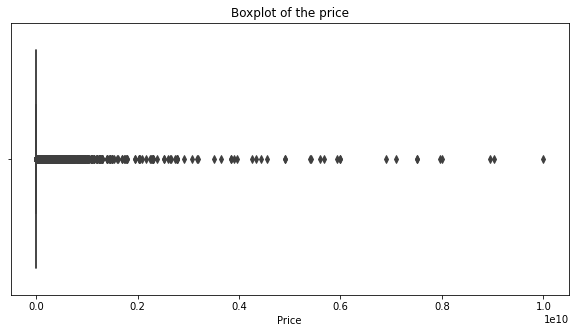

In [25]:
# Boxplot of the price
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, x='price', ax=ax)
ax.set_title('Boxplot of the price')
ax.set_xlabel('Price')
plt.show()

> Now the extreme values are more clear. Lets remove them and then plot again.

In [26]:
# remove outliers from price
Q1, Q3 = df['price'].quantile([0.25, 0.75])
IQR = Q3 - Q1

before = df.shape[0]

# If the price is less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR, remove it
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

after = df.shape[0]


print(f'Records before removing outliers: {before}')
print(f'Records after removing outliers: {after}')
print(f'% of records removed: {(before - after) / before * 100:.2f}%')

Records before removing outliers: 533024
Records after removing outliers: 482364
% of records removed: 9.50%


> 9.5% is not a lot, I will be fine with dropping them for now. And we can always come back to them later.

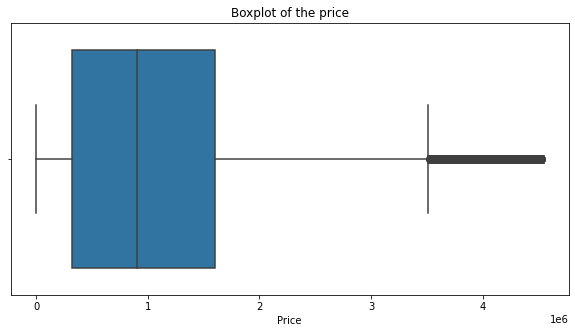

In [27]:
# Boxplot of the price
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, x='price', ax=ax)
ax.set_title('Boxplot of the price')
ax.set_xlabel('Price')
plt.show()

> The boxplot looks a lot better now. And it shows that the median price is around ~0.9M.

> Lets try to log transform the distribution again.

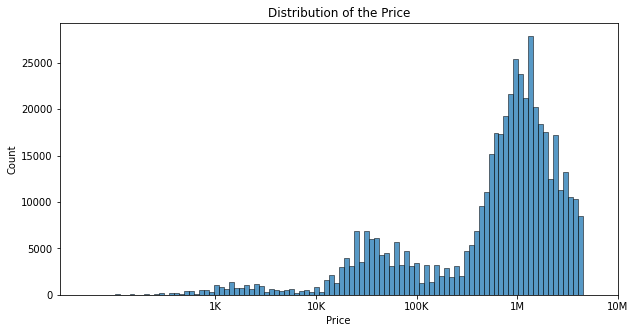

In [28]:
# Plotting the distribution of the price after log transformation.
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=np.log(df['price']), ax=ax, bins=100)

# Define the desired x-axis tick positions and labels
xticks = [1000, 10000, 100000, 1000000, 10000000]
xticklabels = ['1K', '10K', '100K', '1M', '10M']

# Set the x-axis tick positions and labels
ax.set_xticks(np.log(xticks))
ax.set_xticklabels(xticklabels)

# Set the title, labels, and display the plot
ax.set_title('Distribution of the Price')
ax.set_xlabel('Price')
ax.set_ylabel('Count')
plt.show()

### 3.B Exploring other variables

It will be easier to ask to explore the other variables if we ask questions about the dataset and try to answer them.

#### 3.B.I Question 1: What cities have the most/least listings?

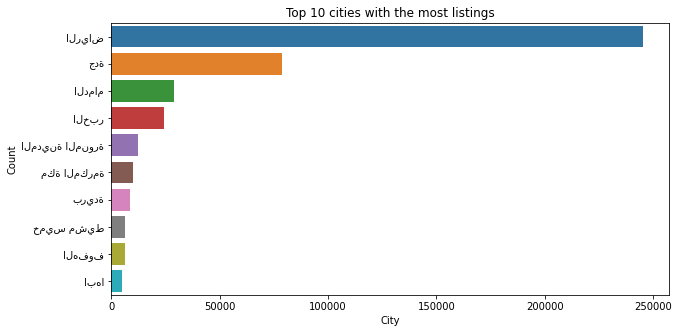

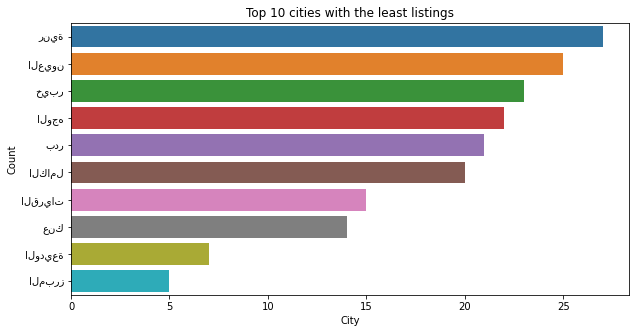

In [29]:
# Plotting top 10 cities with the most listings
fig, ax = plt.subplots(figsize=(10, 5))

# Horizontal count plot
sns.countplot(data=df, y='city', ax=ax, order=df['city'].value_counts().iloc[:10].index)
ax.set_title('Top 10 cities with the most listings')
ax.set_xlabel('City')
ax.set_ylabel('Count')
plt.show()

# Plotting top 10 cities with the least listings
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, y='city', ax=ax, order=df['city'].value_counts().iloc[-10:].index)
ax.set_title('Top 10 cities with the least listings')
ax.set_xlabel('City')
ax.set_ylabel('Count')
plt.show()

> The reversed arabic text is an issue. After some googling, I found a [solution](https://stackoverflow.com/questions/54064646/arabic-letters-arent-showing-correctly-in-the-plot) to this problem by using `arabic_reshaper` and `bidi.algorithm`.

In [30]:
import arabic_reshaper
from bidi.algorithm import get_display

unique_cities = df['city'].unique()

reshaped_cities = {city: get_display(arabic_reshaper.reshape(city)) for city in unique_cities}

df['city_reshaped'] = df['city'].map(reshaped_cities)


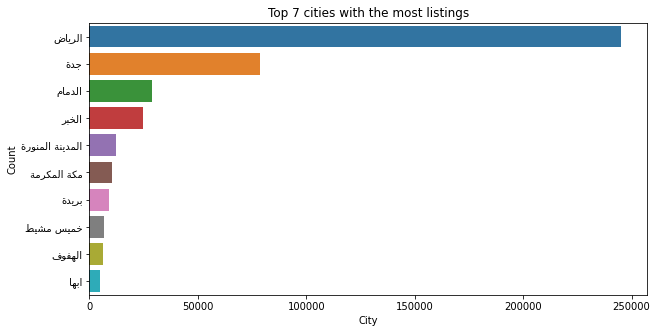

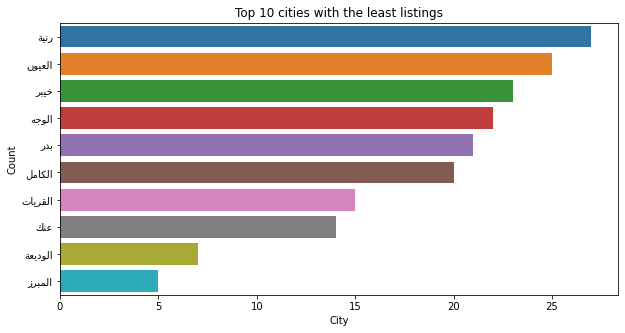

In [31]:
# Plotting top 10 cities with the most listings
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=df, y='city_reshaped', ax=ax, order=df['city_reshaped'].value_counts().iloc[:10].index)
ax.set_title('Top 7 cities with the most listings')
ax.set_xlabel('City')
ax.set_ylabel('Count')
plt.show()

# Plotting top 10 cities with the least listings
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, y='city_reshaped', ax=ax, order=df['city_reshaped'].value_counts().iloc[-10:].index)
ax.set_title('Top 10 cities with the least listings')
ax.set_xlabel('City')
ax.set_ylabel('Count')
plt.show()

> Now it looks readable!

> We can see that Riyadh has the most listings, followed by Jeddah and Dammam.

> And the least listings are in Al Mubarraz, Al Wadiah and Anak. Some of them i've never heard of.

#### 3.B.II Question 2: What are the most expensive cities on average?

C:\Users\zezot\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


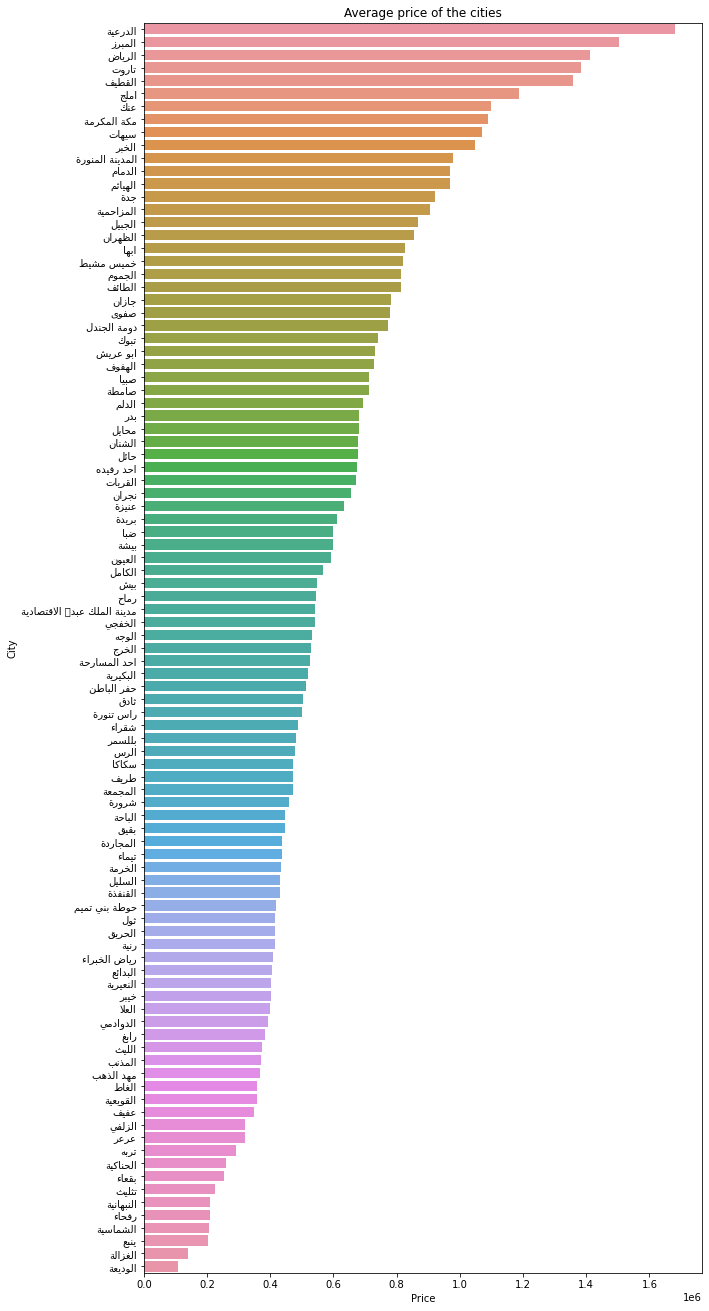

In [32]:
#### Question 2: What are the most/least expensive cities?
# Plotting the average price of the cities
fig, ax = plt.subplots(figsize=(10, 23))
sns.barplot(data=df, x='price', y='city_reshaped', ax=ax, estimator=np.mean, ci=None, order=df.groupby('city_reshaped')['price'].mean().sort_values(ascending=False).index)
ax.set_title('Average price of the cities')
ax.set_xlabel('Price')
ax.set_ylabel('City')
plt.show()



> We can see that the most expensive city is Al Diriyah, followed by Al Mubarraz and Al Riyadh.

### 3.B.III Question 3: How do the prices vary across the cities?

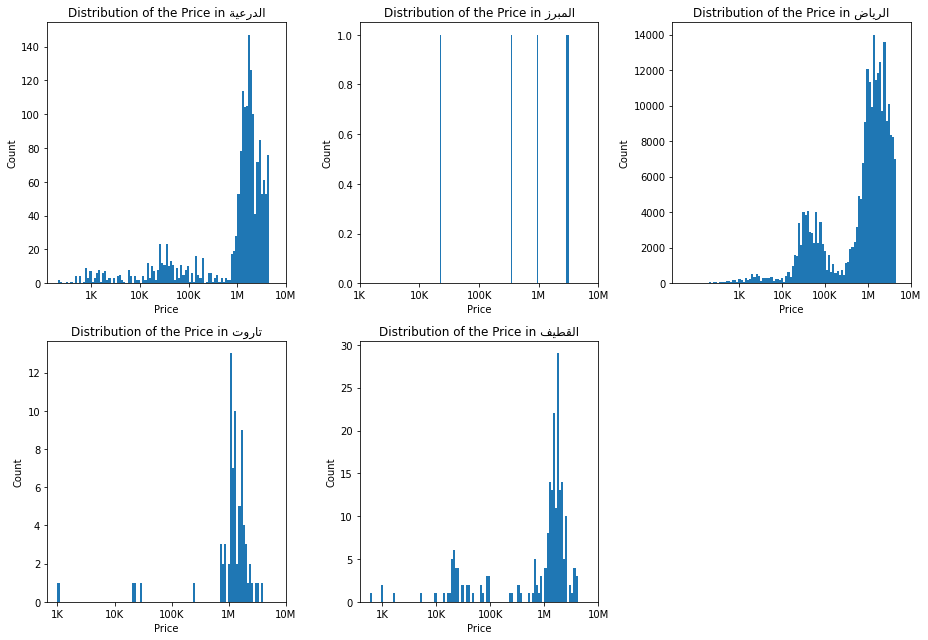

In [33]:
# Plotting the distribution of the price after log transformation for each city in the top 5 cities

# Get the top 5 cities by mean price
top_cities = df.groupby('city_reshaped')['price'].mean().sort_values(ascending=False).index[:5]

# Calculate the number of rows and columns for the subplot grid
num_rows = 2
num_cols = (len(top_cities) + 1) // num_rows

# Set up the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(13, 9))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over the top cities and plot the distribution for each
for i, city in enumerate(top_cities):
    ax = axes[i]
    data = np.log(df[df['city_reshaped'] == city]['price'])
    ax.hist(data, bins=100)
    ax.set_xticks(np.log([1000, 10000, 100000, 1000000, 10000000]))
    ax.set_xticklabels(['1K', '10K', '100K', '1M', '10M'])
    ax.set_title(f'Distribution of the Price in {city}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Count')

# Remove empty subplots
for j in range(len(top_cities), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



> The distribution of Al Mubarraz is weird, and that is mainly caused by the small number of listings in that city. Since we showed that it is the lowest in terms of number of listings.

In [34]:
(df.city == 'المبرز').sum()

5

> Yeah.. only 5 listings, so it technically should not be the 2nd most expensive city on average.

> Lets see how many cities have low number of listings. I will consider 1000 listings as a low number for cities, and 100 listings for districts.

In [35]:
cities_thresh = 500
districts_thresh = 50

print(f'Number of cities with less that or equal to {cities_thresh} listings: {(df.city.value_counts() <= cities_thresh).sum()}')
print(f'Total number of cities: {df.city.nunique()}')

print(f'Number of districts with less that or equal to {districts_thresh} listings: {(df.district.value_counts() <= districts_thresh).sum()}')
print(f'Total number of districts: {df.district.nunique()}')

Number of cities with less that or equal to 500 listings: 57
Total number of cities: 97
Number of districts with less that or equal to 50 listings: 602
Total number of districts: 1080


> Lets drop the cities with low number of listings. It might be not be a good idea to not consider some of the cities, but they might mislead the model.

In [36]:
# Drop cities with less than or equal to 100 listings
cities = df.city.value_counts()[df.city.value_counts() <= cities_thresh].index


# Drop districts with less than or equal to 25 listings
districts = df.district.value_counts()[df.district.value_counts() <= districts_thresh].index

print(f'Number of records to be dropped with cities: {df[df.city.isin(cities)].shape[0]}')
print(f'Number of records to be dropped with districts: {df[df.district.isin(districts)].shape[0]}')


Number of records to be dropped with cities: 9334
Number of records to be dropped with districts: 8883


> Dropping those records should save us from unexpected distributions due to low number of listings.

In [37]:
# Dropping records with cities and districts less than or equal to the threshold
df = df[~df.city.isin(cities)]
df = df[~df.district.isin(districts)]

### 3.B.IIII Question 4: What are the most common categories?

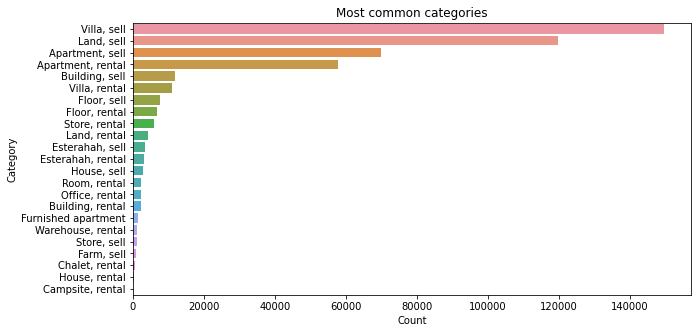

In [38]:
# Plot most common categories 
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, y='category', ax=ax, order=df['category'].value_counts().index)
ax.set_title('Most common categories')
ax.set_xlabel('Count')
ax.set_ylabel('Category')
plt.show()



> Looks like (`Villa, sell`), (`Land, sell`), (`Apartment, sell`) and (`apartment, rental`) are the most common categories. And the others are lower by quite a margin. That gives us a clue on encoding the categories. We can encode the most common categories with their own columns, and the rest with a single column (other).

> Lets see if there is any category with very low number of listings.

In [39]:
df.category.value_counts().sort_values(ascending=True)

Campsite, rental            1
House, rental             326
Chalet, rental            685
Farm, sell                996
Store, sell              1114
Warehouse, rental        1203
Furnished apartment      1398
Building, rental         2209
Office, rental           2399
Room, rental             2415
House, sell              2775
Esterahah, rental        3117
Esterahah, sell          3314
Land, rental             4209
Store, rental            5867
Floor, rental            6738
Floor, sell              7716
Villa, rental           11044
Building, sell          11771
Apartment, rental       57680
Apartment, sell         69877
Land, sell             119620
Villa, sell            149653
Name: category, dtype: int64

> Yeah, `Campsite, rental` has only 1 record, lets drop it so that it doesn't affect our feature engineering.

In [40]:
df = df[df.category != 'Campsite, rental']

In [41]:
df.category.value_counts().sort_values(ascending=True)

House, rental             326
Chalet, rental            685
Farm, sell                996
Store, sell              1114
Warehouse, rental        1203
Furnished apartment      1398
Building, rental         2209
Office, rental           2399
Room, rental             2415
House, sell              2775
Esterahah, rental        3117
Esterahah, sell          3314
Land, rental             4209
Store, rental            5867
Floor, rental            6738
Floor, sell              7716
Villa, rental           11044
Building, sell          11771
Apartment, rental       57680
Apartment, sell         69877
Land, sell             119620
Villa, sell            149653
Name: category, dtype: int64

> Good.

### 3.B.V Question 5: How different categories of listings vary in price?

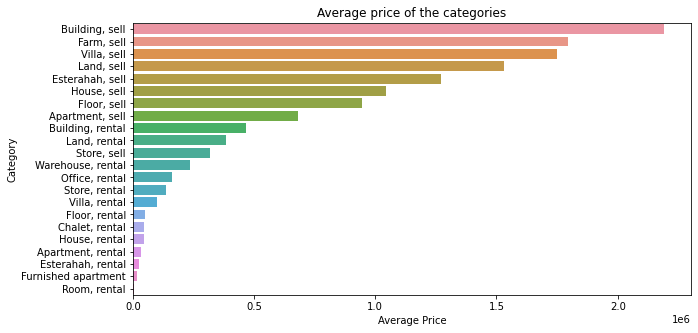

In [42]:
# Plotting the average price of the categories
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df, x='price', y='category', ax=ax, estimator=np.mean, ci=None, order=df.groupby('category')['price'].mean().sort_values(ascending=False).index)
ax.set_title('Average price of the categories')
ax.set_xlabel('Average Price')
ax.set_ylabel('Category')
plt.show()


> Interesting! we can clearly see that properties for sell are more expensive than properties for rent. And that makes sense.

> Coming to think of it, we can use this information to create a new feature. We can create a feature that indicates whether the listing is for sell or rent. And then we can drop the `category` column. 

> However, we do not know if `Furnished apartment` is for rent or sell. But we can assume that it is for rent, since its one of the lowest categories in terms of price.

In [43]:
df.category.value_counts()

Villa, sell            149653
Land, sell             119620
Apartment, sell         69877
Apartment, rental       57680
Building, sell          11771
Villa, rental           11044
Floor, sell              7716
Floor, rental            6738
Store, rental            5867
Land, rental             4209
Esterahah, sell          3314
Esterahah, rental        3117
House, sell              2775
Room, rental             2415
Office, rental           2399
Building, rental         2209
Furnished apartment      1398
Warehouse, rental        1203
Store, sell              1114
Farm, sell                996
Chalet, rental            685
House, rental             326
Name: category, dtype: int64

## 4- Feature Engineering
Lets create some new features that might be useful for the model.

1. `avg_price_city`: Average price of the city.
2. `avg_price_district`: Average price of the district.
2. `avg_price_category`: Average price of the category.
3. `is_sell`: Whether the listing is for sell or rent.

In [44]:
avg = df.groupby('city').mean()['price']

df['avg_price_city'] = df['city'].map(avg)

df.head()

,id,price,category,beds,livings,wc,area,street_width,kitchen,ac,furnished,city,city_id,district,district_id,city_reshaped,avg_price_city
0,4331,1958400.0,"Land, sell",0,0,0,816.0,60.0,False,False,False,الرياض,21,حي الدار البيضاء,424,ﺽﺎﻳﺮﻟﺍ,1.413978e+06
3,6520,50000.0,"Land, rental",0,0,0,400.0,35.0,False,False,False,جدة,66,حي الرياض,3490,ﺓﺪﺟ,9.205957e+05
4,8847,3000000.0,"Land, sell",0,0,0,870.0,15.0,False,False,False,الخبر,12,حي الثقبة,1060,ﺮﺒﺨﻟﺍ,1.044857e+06
5,8968,1050000.0,"Land, sell",0,0,0,875.0,30.0,False,False,False,الرياض,21,حي الدار البيضاء,424,ﺽﺎﻳﺮﻟﺍ,1.413978e+06
6,11244,350000.0,"Building, rental",0,0,0,780.0,40.0,False,False,False,الدمام,18,حي طيبة,1318,ﻡﺎﻣﺪﻟﺍ,9.718807e+05


In [45]:
avg = df.groupby('district').mean()['price']

df['avg_price_district'] = df['district'].map(avg)

df.head()

,id,price,category,beds,livings,wc,area,street_width,kitchen,ac,furnished,city,city_id,district,district_id,city_reshaped,avg_price_city,avg_price_district
0,4331,1958400.0,"Land, sell",0,0,0,816.0,60.0,False,False,False,الرياض,21,حي الدار البيضاء,424,ﺽﺎﻳﺮﻟﺍ,1.413978e+06,8.828761e+05
3,6520,50000.0,"Land, rental",0,0,0,400.0,35.0,False,False,False,جدة,66,حي الرياض,3490,ﺓﺪﺟ,9.205957e+05,9.533200e+05
4,8847,3000000.0,"Land, sell",0,0,0,870.0,15.0,False,False,False,الخبر,12,حي الثقبة,1060,ﺮﺒﺨﻟﺍ,1.044857e+06,1.003358e+06
5,8968,1050000.0,"Land, sell",0,0,0,875.0,30.0,False,False,False,الرياض,21,حي الدار البيضاء,424,ﺽﺎﻳﺮﻟﺍ,1.413978e+06,8.828761e+05
6,11244,350000.0,"Building, rental",0,0,0,780.0,40.0,False,False,False,الدمام,18,حي طيبة,1318,ﻡﺎﻣﺪﻟﺍ,9.718807e+05,1.039047e+06


In [46]:
avg = df.groupby('category').mean()['price']

df['avg_price_category'] = df['category'].map(avg)

df.head()

,id,price,category,beds,livings,wc,area,street_width,kitchen,ac,furnished,city,city_id,district,district_id,city_reshaped,avg_price_city,avg_price_district,avg_price_category
0,4331,1958400.0,"Land, sell",0,0,0,816.0,60.0,False,False,False,الرياض,21,حي الدار البيضاء,424,ﺽﺎﻳﺮﻟﺍ,1.413978e+06,8.828761e+05,1.530812e+06
3,6520,50000.0,"Land, rental",0,0,0,400.0,35.0,False,False,False,جدة,66,حي الرياض,3490,ﺓﺪﺟ,9.205957e+05,9.533200e+05,3.846123e+05
4,8847,3000000.0,"Land, sell",0,0,0,870.0,15.0,False,False,False,الخبر,12,حي الثقبة,1060,ﺮﺒﺨﻟﺍ,1.044857e+06,1.003358e+06,1.530812e+06
5,8968,1050000.0,"Land, sell",0,0,0,875.0,30.0,False,False,False,الرياض,21,حي الدار البيضاء,424,ﺽﺎﻳﺮﻟﺍ,1.413978e+06,8.828761e+05,1.530812e+06
6,11244,350000.0,"Building, rental",0,0,0,780.0,40.0,False,False,False,الدمام,18,حي طيبة,1318,ﻡﺎﻣﺪﻟﺍ,9.718807e+05,1.039047e+06,4.674077e+05


In [47]:
# Creating is_sell column
df['is_sell'] = df['category'].apply(lambda x: 1 if x.endswith('sell') else 0)

In [48]:
df.columns

Index(['id', 'price', 'category', 'beds', 'livings', 'wc', 'area',
       'street_width', 'kitchen', 'ac', 'furnished', 'city', 'city_id',
       'district', 'district_id', 'city_reshaped', 'avg_price_city',
       'avg_price_district', 'avg_price_category', 'is_sell'],
      dtype='object')

## 5- Correlation Analysis

### 5.A Q: Is there any correlation between the variables?

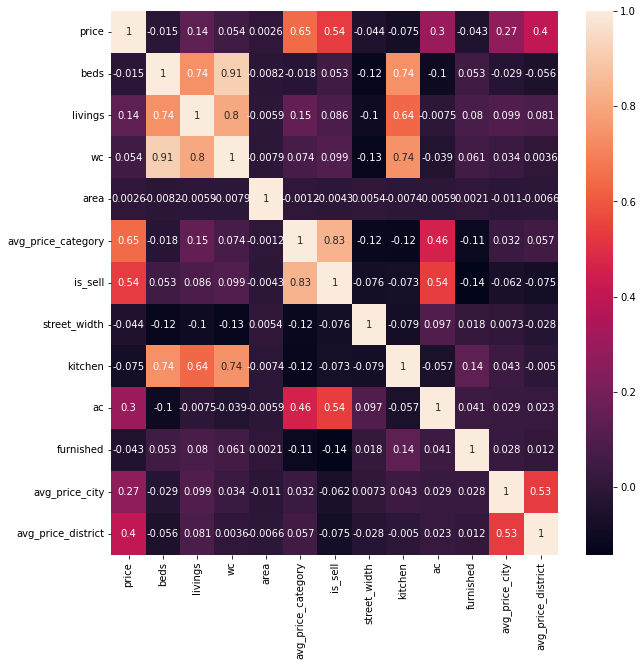

In [49]:
# Correlation matrix
wanted = ['price', 'beds', 'livings', 'wc', 'area', 'avg_price_category', 'is_sell',
       'street_width', 'kitchen', 'ac', 'furnished', 'avg_price_city',
       'avg_price_district']

corr = df[wanted].corr()

# Plotting the correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()


> We can see that properties for sell have a decent correlation with the price. 
Also, avg_price_category is the highest correlated feature with the price. 

## 6- Preprocessing

### 6.A Selecting the features

In [50]:
wanted = ['price', 'beds', 'livings', 'wc', 'area',  'is_sell',
       'street_width', 'kitchen', 'ac', 'furnished', 'avg_price_category', 'avg_price_city',
       'avg_price_district']

# keep only the wanted columns
df = df[wanted]

df.head(2)

,price,beds,livings,wc,area,is_sell,street_width,kitchen,ac,furnished,avg_price_category,avg_price_city,avg_price_district
0,1958400.0,0,0,0,816.0,1,60.0,False,False,False,1.530812e+06,1.413978e+06,882876.105579
3,50000.0,0,0,0,400.0,0,35.0,False,False,False,3.846123e+05,9.205957e+05,953320.021268


In [51]:
df.dtypes

price                 float64
beds                    int32
livings                 int32
wc                      int32
area                  float64
is_sell                 int64
street_width          float64
kitchen                  bool
ac                       bool
furnished                bool
avg_price_category    float64
avg_price_city        float64
avg_price_district    float64
dtype: object

## 7- Building the model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

wanted = ['price', 'beds', 'livings', 'wc', 'area',  'is_sell',
       'street_width', 'kitchen', 'ac', 'furnished', 'avg_price_category', 'avg_price_city',
       'avg_price_district']

# Prepare the dataset
X = df[wanted[1:]]
y = df['price']



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create the XGBoost model
model = XGBRegressor()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the R2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R2 scores
print("Training R2 Score:", r2_train)
print("Testing R2 Score:", r2_test)


Training R2 Score: 0.9012834955420785
Testing R2 Score: 0.8916481462311265


> An R2 score of 0.891 on testing data is pretty good! And compared to the training score (0.901) it is not overfitting. Because the difference between the training and testing scores is not that big.

> This means that our model can capture **89.16%** of the variance in the testing data.

In [53]:
importance_scores = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)



               Feature  Importance
9   avg_price_category    0.603546
11  avg_price_district    0.143677
10      avg_price_city    0.078599
3                 area    0.054434
2                   wc    0.036257
4              is_sell    0.020759
1              livings    0.016465
5         street_width    0.015874
6              kitchen    0.011643
8            furnished    0.011577
0                 beds    0.006118
7                   ac    0.001052


> We can see that `avg_price_category` is the most important feature by a big margin. Followed by `avg_price_district` and `avg_price_city`.

This could mean a couple of things:
1. The category of the property is the most important factor in determining the price. (e.g. Villa, Land, Apartment, etc..)
2. Knowing the district of the property is more indicative of the price than the city.


### 7.A Trying to minimize the variables used in the model 
> Lets try the same model but we include only the top 4 most important features in the previous model. This way, we can reduce the number of variables used in the model while maintaining a good performance.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

top4 = feature_importances.head(4)['Feature'].values

# Prepare the dataset
X = df[top4]
y = df['price']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create the XGBoost model
model = XGBRegressor()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the R2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R2 scores
print("Training R2 Score:", r2_train)
print("Testing R2 Score:", r2_test)

Training R2 Score: 0.8945921503256768
Testing R2 Score: 0.8863906183976131


> We have only used 4 variables, and we got a score of 0.866 on testing data. Which is great! we have significantly reduced the number of variables used in the model while maintaining a good performance.

> That also means our 4 variables are extremely important in predicting the price.

In [55]:
importance_scores = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

              Feature  Importance
0  avg_price_category    0.600205
1  avg_price_district    0.200241
2      avg_price_city    0.124380
3                area    0.075175


## Conclusion

With this dataset taken from Kaggle which was scrapped from aqar.com, our objective was to predict the price of a property given some features. We started by exploring the data and visualizing it. Then we did some feature engineering and preprocessing. And finally we built a model and evaluated it.

Some insights we got from this analysis:
1. Riyadh, Jeddah and Dammam have the most listings. Which is expected.
2. Al Mubarraz, Al Wadiah and Anak have the least listings.
3. Al Diriyah, Al Riyadh and [Tarout](https://ar.wikipedia.org/wiki/%D8%AA%D8%A7%D8%B1%D9%88%D8%AA_(%D8%AC%D8%B2%D9%8A%D8%B1%D8%A9)) are the most expensive cities on average. 
4. The most common categories are Villa for sell, Land for sell, Apartment for sell and Apartment for rent.
5. Properties for sell are significantly more expensive than properties for rent.
6. The average price of the category was correlated with the price. Followed by the average price of the district.
7. The average price of the category was the most important feature in predicting the price. Followed by the average price of the district and the city.


Finally, we trained our XGBoost model and got a score of 0.8916 on testing data. Which means that our model can capture/explain **89.16%** of the variance in the testing data.